<h1>                                          AUTOMOBILE                                            </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr

<H3>IMPORT THE DATA</H3>

In [2]:
data=pd.read_csv("file:///C:/Users/PRADEEP%20PRIYA/Downloads/imports-85.data",header=None,na_values="?")
data.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<H5> There are some missing data and also there is no columns name</H5>
<H3> NAME THE COLUMNS</H3>

In [3]:
data.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
data.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

<h1PRIYA style="color:red"></h1>



<h3>COLUMN 1: SYMBOLING</h3>
<h5>symboling is the discrete data</h5>


In [6]:
data.symboling.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [7]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='count'>

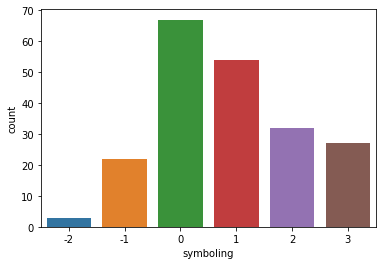

In [8]:
sns.countplot(data.symboling)

<h3>COLUMN 2:NORMALIZED LOSSES</h3>
<h5>Normalized losses is continuous data</h5>

In [9]:
data.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [10]:
data.normalized_losses.isnull().sum()

41

In [11]:
data.normalized_losses.fillna(data.normalized_losses.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d444de0460>,
 'caps': [<matplotlib.lines.Line2D at 0x2d444de0ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d444dcdfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d444dec220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d444dec5b0>],
 'means': []}

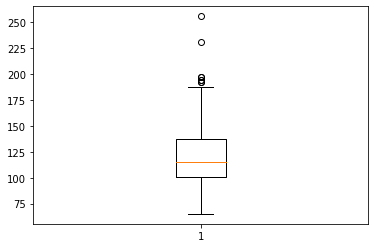

In [12]:
plt.boxplot(data.normalized_losses)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

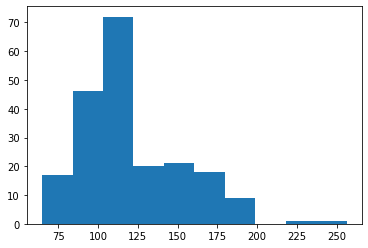

In [13]:
plt.hist(data.normalized_losses)

In [14]:
stats.shapiro(data.normalized_losses)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

<h3>COLUMN 3: MAKE</h3>
<h5>make is the discrete data</h5>


In [15]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [16]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

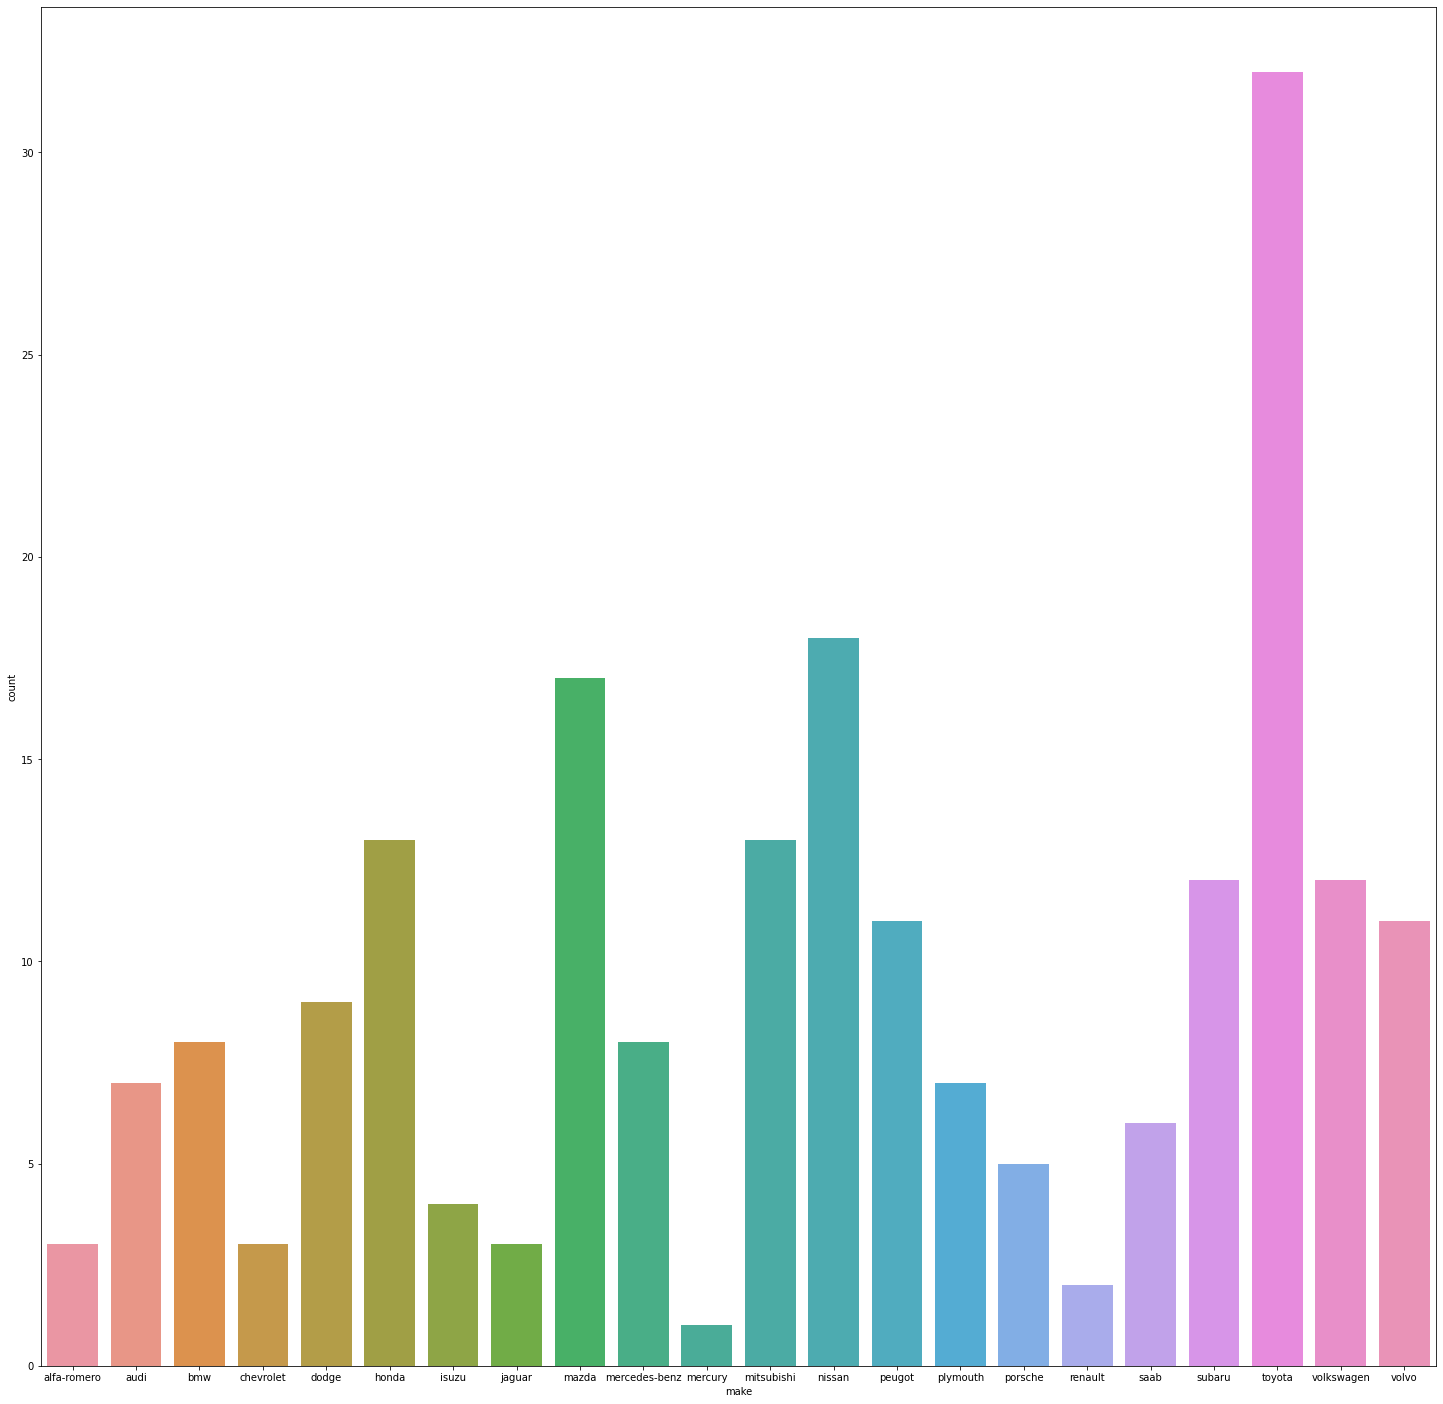

In [17]:
plt.figure(figsize=(25,25))
sns.countplot(data.make)#data.make.unique(),data.make.nunique

<h3>COLUMN 4: FUEL TYPE</h3>
<h5>fuel type is the discrete data

In [18]:
data.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

In [19]:
data.fuel_type.value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

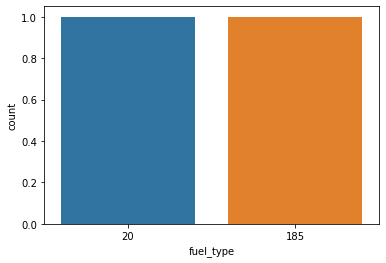

In [20]:
sns.countplot(data.fuel_type.value_counts())

<h3>COLUMN 5: ASPIRATION</h3>
<h5>aspiration is discrete data</h5>

In [21]:
data.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [22]:
data.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aspiration', ylabel='count'>

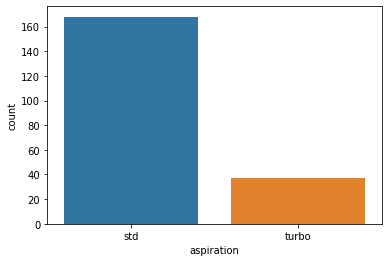

In [23]:
sns.countplot(data.aspiration)

<h3>COLUMN 6: NUMBER OF DOORS</h3>
<h5>Number of doors is discrete data</h5>

In [24]:
data.num_of_doors.describe()

count      203
unique       2
top       four
freq       114
Name: num_of_doors, dtype: object

In [25]:
data.num_of_doors.isnull().sum()

2

In [26]:
data.num_of_doors.fillna('four',inplace=True)


In [27]:
data.num_of_doors.value_counts()

four    116
two      89
Name: num_of_doors, dtype: int64

In [28]:
data.num_of_doors.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_doors', ylabel='count'>

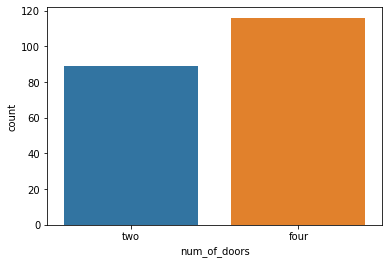

In [29]:
sns.countplot(data.num_of_doors)

<h3>COLUMN 7: BODY OF STYLE</h3>
<h5>Body of style is discrete data</h5>

In [30]:
data.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [31]:
data.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

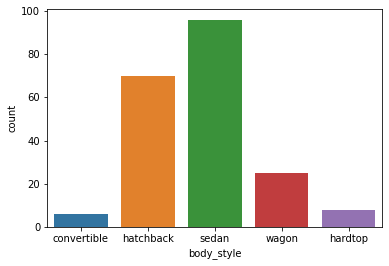

In [32]:
sns.countplot(data.body_style)

<h3>COLUMN 8: DRIVE WHEELS</h3>
<h5>Drive wheels is discrete data</h5>

In [33]:
data.drive_wheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: drive_wheels, dtype: object

In [34]:
data.drive_wheels.isnull().sum()

0

In [35]:
data.drive_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive_wheels', ylabel='count'>

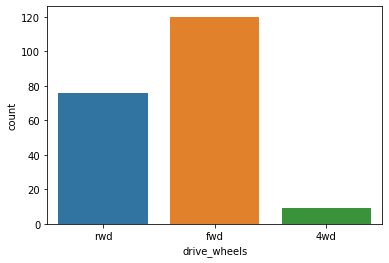

In [36]:
sns.countplot(data.drive_wheels)

<h3>COLUMN 9:ENGINE LOCATION</h3>
<h5>Engine location is discrete data</h5>

In [37]:
data.engine_location.describe()

count       205
unique        2
top       front
freq        202
Name: engine_location, dtype: object

In [38]:
data.engine_location.isnull().sum()

0

In [39]:
data.engine_location.value_counts()


front    202
rear       3
Name: engine_location, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_location', ylabel='count'>

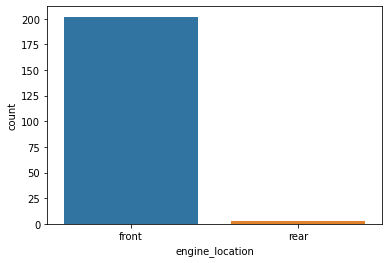

In [40]:
sns.countplot(data.engine_location)

<h3>COLUMN 10:WHEEL BASE</h3>
<h5>Wheel Base is continuous data</h5>

In [41]:
data.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

In [42]:
data.wheel_base.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4451a7070>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4451a7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445199ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4451a7eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4451b3280>],
 'means': []}

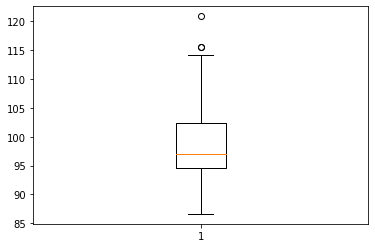

In [43]:
plt.boxplot(data.wheel_base)

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

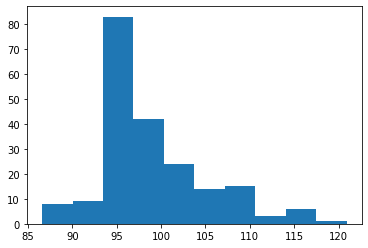

In [44]:
plt.hist(data.wheel_base)

In [45]:
stats.shapiro(data.wheel_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

<h3>COLUMN 11:LENGTH</h3>
<h5>Length is continuous data</h5>

In [46]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [47]:
data.length.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44529b220>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44529b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d44528ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4452a60a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4452a6430>],
 'means': []}

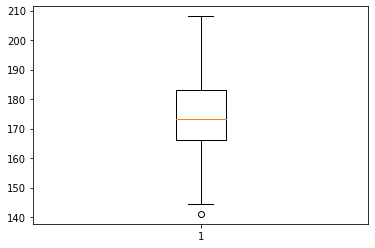

In [48]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

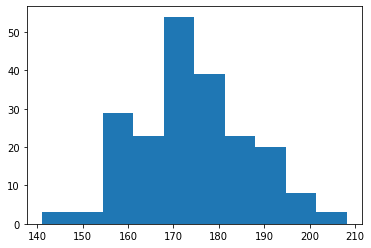

In [49]:
plt.hist(data.length)

In [50]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

<h3>COLUMN 12:WIDTH</h3>
<h5>Width is continuous data</h5>

In [51]:
data.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [52]:
data.width.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4453881c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4453888e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445377df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d445392040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4453923d0>],
 'means': []}

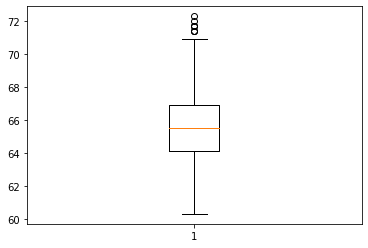

In [53]:
plt.boxplot(data.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

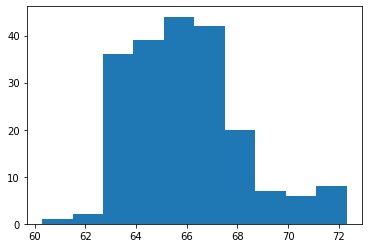

In [54]:
plt.hist(data.width)

In [55]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

<h3>COLUMN 13:HEIGHT</h3>
<h5>Height is continuous data</h5>

In [56]:
data.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [57]:
data.height.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44545cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44546d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d44545cbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44546ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d44547b190>],
 'means': []}

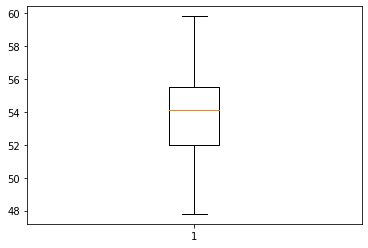

In [58]:
plt.boxplot(data.height)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

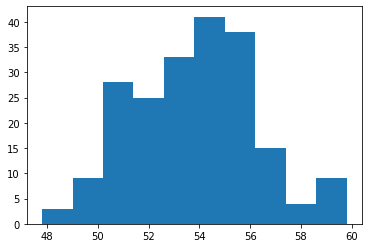

In [59]:
plt.hist(data.height)

In [60]:
stats.shapiro(data.height)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

<h3>COLUMN 14:CURB WEIGHT</h3>
<h5>Curb Weight is continuous data</h5>

In [61]:
data.curb_weight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [62]:
data.curb_weight.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4455594c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d445559be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445559130>],
 'medians': [<matplotlib.lines.Line2D at 0x2d445563340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4455636d0>],
 'means': []}

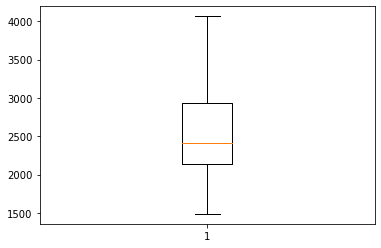

In [63]:
plt.boxplot(data.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

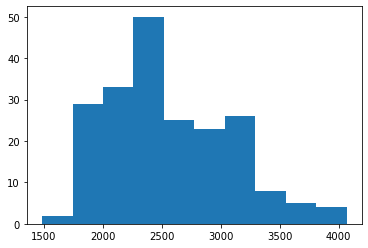

In [64]:
plt.hist(data.curb_weight)

In [65]:
stats.shapiro(data.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

<h3>COLUMN 15:ENGINE TYPE</h3>
<h5>Engine Type is discrete data</h5>

In [66]:
data.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [67]:
data.engine_type.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

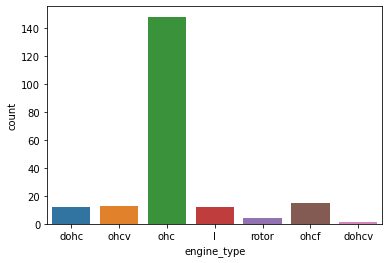

In [151]:
sns.countplot(data.engine_type)

<h3>COLUMN 16:NO OF CYLINDERS</h3>
    <h5>No of cylinders is discrete data</h5>

In [153]:
data.num_of_cylinders.describe()

count                205
unique                 2
top       four and below
freq                 164
Name: num_of_cylinders, dtype: object

In [68]:
data.num_of_cylinders.isnull().sum()

0

In [70]:
data.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

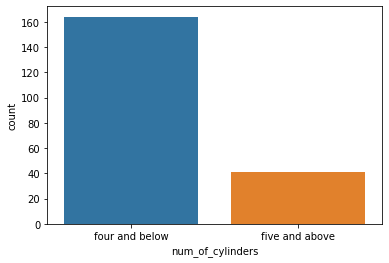

In [71]:
data.num_of_cylinders=data.num_of_cylinders.replace(['three','two','four'],"four and below")
data.num_of_cylinders=data.num_of_cylinders.replace(['six','five','eight','twelve'],"five and above")
sns.countplot(data.num_of_cylinders)

<h3>COLUMN 17:ENGINE SIZE</h3>
<h5>Engine Size is continuous data</h5>

In [72]:
data.engine_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [73]:
data.engine_size.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4456feca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44570c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4456fe910>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44570cb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d44570ceb0>],
 'means': []}

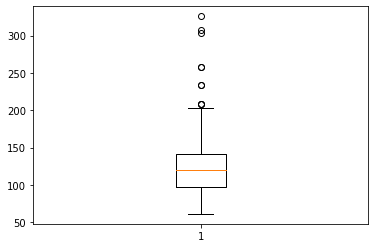

In [74]:
plt.boxplot(data.engine_size)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

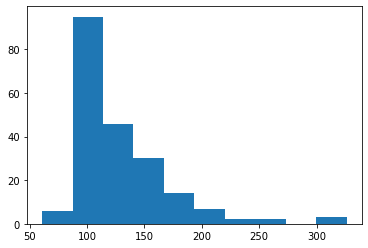

In [75]:
plt.hist(data.engine_size)

In [76]:
stats.shapiro(data.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

<h3>COLUMN 18:FUEL SYSTEM</h3>
<h5>Fuel System is discrete data</h5>

In [77]:
data.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [78]:
data.fuel_system.isnull().sum()

0

<AxesSubplot:xlabel='fuel_system', ylabel='count'>

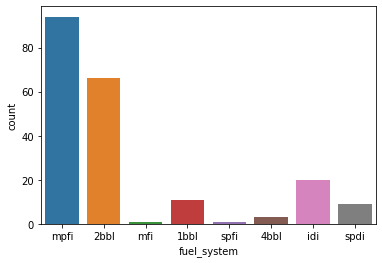

In [79]:
sns.countplot(x="fuel_system",data=data)

<h3>COLUMN 19:BORE</h3>
<h5>Bore is continuous data</h5>


In [80]:
data.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [81]:
data.bore.isnull().sum()

4

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44585a0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44585a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d44584acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44585aee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4458642b0>],
 'means': []}

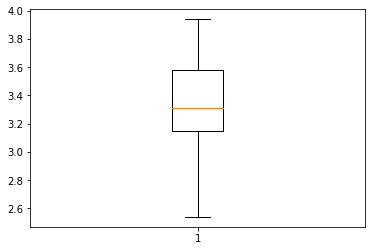

In [82]:
data.bore.fillna(data.bore.mean(),inplace=True)
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

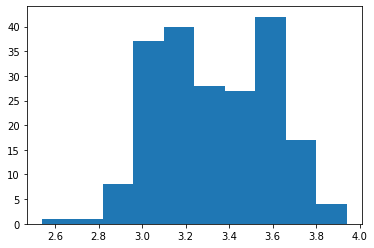

In [83]:
plt.hist(data.bore)

In [84]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

<H3>COLUMN 20: STROKE</H3>
<h5>Stroke is continuous data</h5>

In [85]:
data.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [86]:
data.stroke.isnull().sum()

4

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44594f040>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44594f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445940c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44594fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d44595b250>],
 'means': []}

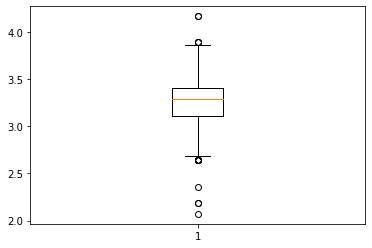

In [87]:
data.stroke.fillna(data.stroke.median(),inplace=True)
plt.boxplot(data.stroke)

In [88]:
q3=data.stroke.quantile(0.75)
q1=data.stroke.quantile(0.25)

In [89]:
iqr=q3-q1

In [90]:
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)

In [91]:
data[(data.stroke<UE)&(data.stroke>LE)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [92]:
data.stroke[data.stroke>UE]=UE

C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_4328/2497038561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.stroke[data.stroke>UE]=UE


In [93]:
data.stroke[data.stroke<LE]=LE

C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_4328/1604507181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.stroke[data.stroke<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2d4459b9250>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4459b9970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4459aeee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4459b9f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4459c7340>],
 'means': []}

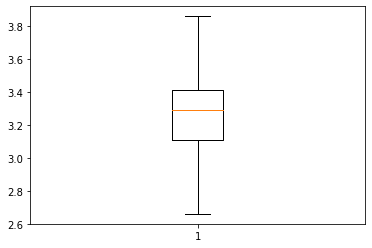

In [94]:
plt.boxplot(data.stroke)

(array([18.,  3.,  3., 31., 36., 28., 51., 21.,  5.,  9.]),
 array([2.66, 2.78, 2.9 , 3.02, 3.14, 3.26, 3.38, 3.5 , 3.62, 3.74, 3.86]),
 <BarContainer object of 10 artists>)

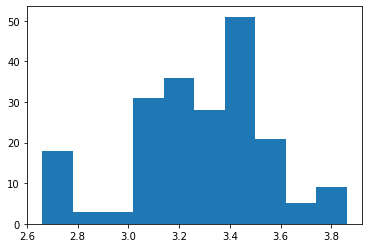

In [95]:
plt.hist(data.stroke)

In [96]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9504072666168213, pvalue=1.5814290463822545e-06)

<h3>COLUMN 21:COMPRESSION RATIO</h3>
<h5>Compression ratio is continuous data</h5>


In [97]:
data.compression_ratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64

In [98]:
data.compression_ratio.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d445a99880>,
 'caps': [<matplotlib.lines.Line2D at 0x2d445a99fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445a994f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d445aa2700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d445aa2a90>],
 'means': []}

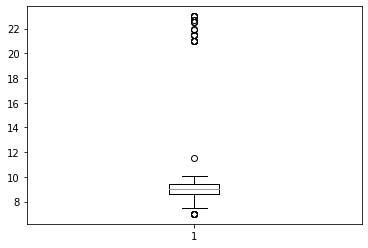

In [99]:
plt.boxplot(data.compression_ratio)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

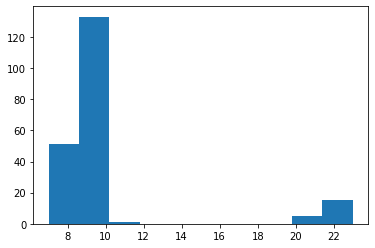

In [100]:
plt.hist(data.compression_ratio)

In [101]:
stats.shapiro(data.compression_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

<h3>COLUMN 22:HORSEPOWER</h3>
<h5>Horsepower is continuous data</h5>

In [102]:
data.horsepower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [103]:
data.horsepower.isnull().sum()

2

{'whiskers': [<matplotlib.lines.Line2D at 0x2d445b7ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x2d445b8b580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d445b7ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x2d445b8bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d445b99070>],
 'means': []}

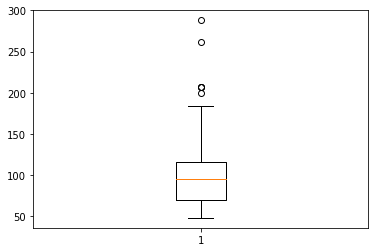

In [104]:
data.horsepower.fillna(data.horsepower.median(),inplace=True)
plt.boxplot(data.horsepower)

(array([55., 51., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

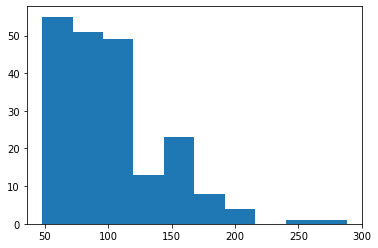

In [105]:
plt.hist(data.horsepower)

In [106]:
stats.shapiro(data.horsepower)

ShapiroResult(statistic=0.8840506672859192, pvalue=1.8387607408909545e-11)

<h3>COLUMN 23:PEAK RPM</h3>
 <h5>Peak rpm is continuous data</h5>

In [107]:
data.peak_rpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [108]:
data.peak_rpm.isnull().sum()

2

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44843fa00>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44844d160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d44843f670>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44844d880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d44844dc10>],
 'means': []}

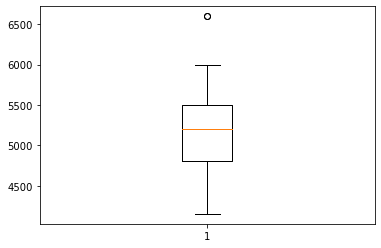

In [109]:
data.peak_rpm.fillna(data.peak_rpm.median(),inplace=True)
plt.boxplot(data.peak_rpm)

(array([17., 10., 41., 31., 33., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

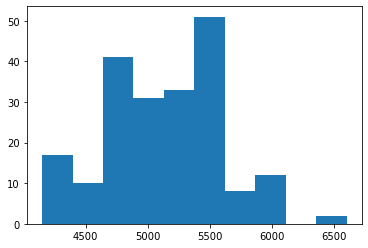

In [110]:
plt.hist(data.peak_rpm)

In [111]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9701935648918152, pvalue=0.00024416492669843137)

<h3>COLUMN 24:CITY MPG</h3>
<h5>City mpg is continuous data</h5>

In [112]:
data.city_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

In [113]:
data.city_mpg.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44851c250>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44851c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d44850fe80>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4485290d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d448529460>],
 'means': []}

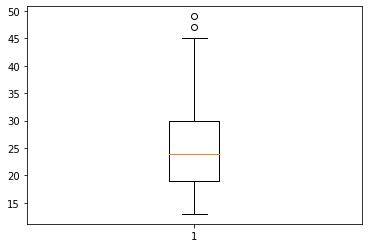

In [114]:
plt.boxplot(data.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

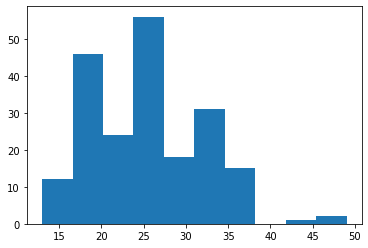

In [115]:
plt.hist(data.city_mpg)

In [116]:
stats.shapiro(data.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

<h3>COLUMN 25:HIGHWAY MPG</h3>
<h5>Highway mpg is continuous data</h5>

In [117]:
data.highway_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway_mpg, dtype: float64

In [118]:
data.highway_mpg.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2d44860d070>,
 'caps': [<matplotlib.lines.Line2D at 0x2d44860d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4485fdca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d44860deb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d448619280>],
 'means': []}

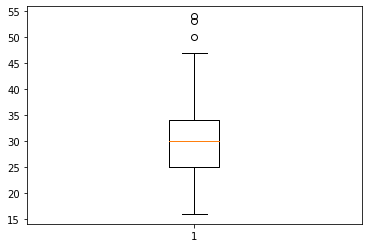

In [119]:
plt.boxplot(data.highway_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

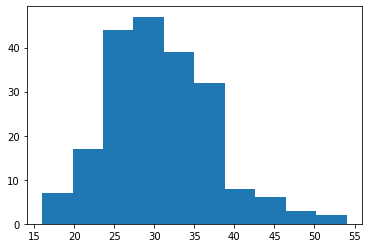

In [120]:
plt.hist(data.highway_mpg)

In [121]:
stats.shapiro(data.highway_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

<h3>COLUMN 26:PRICE
    <h5>Price is continuous data</h5>

In [122]:
data.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [123]:
data.price.isnull().sum()

4

In [124]:
data.price.fillna(data.price.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4486ed730>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4486ede50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4486ed3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4486f65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4486f6940>],
 'means': []}

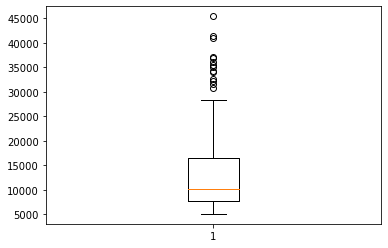

In [125]:
plt.boxplot(data.price)

(array([81., 49., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

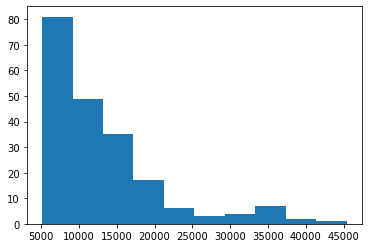

In [126]:
plt.hist(data.price)

In [127]:
stats.shapiro(data.price)

ShapiroResult(statistic=0.7954238057136536, pvalue=1.144922258705021e-15)

In [128]:
pearsonr(data.normalized_losses,data.price)

(0.09548893712250724, 0.17321440617487469)

In [129]:
pearsonr(data.wheel_base,data.price)

(0.584846838972225, 3.338017082369928e-20)

In [130]:
pearsonr(data.length,data.price)

(0.6865674442855647, 6.428844007376483e-30)

In [131]:
pearsonr(data.width,data.price)

(0.7245583242779026, 1.1789696449955338e-34)

In [132]:
pearsonr(data.height,data.price)

(0.1404388185142756, 0.044595778160436715)

In [133]:
pearsonr(data.curb_weight,data.price)

(0.819816683995632, 4.794551240414322e-51)

In [134]:
pearsonr(data.engine_size,data.price)

(0.8603427324326135, 2.5111938680510033e-61)

In [135]:
pearsonr(data.bore,data.price)

(0.5328649013633638, 1.9629473253558344e-16)

In [136]:
pearsonr(data.stroke,data.price)

(0.06775210629806507, 0.33442437359232785)

In [137]:
pearsonr(data.compression_ratio,data.price)

(0.07289043869078718, 0.2989754575667938)

In [138]:
pearsonr(data.horsepower,data.price)

(0.7499191229023525, 2.7701494645429105e-38)

In [139]:
pearsonr(data.peak_rpm,data.price)

(-0.10728291460646898, 0.12574783680166546)

In [140]:
pearsonr(data.city_mpg,data.price)

(-0.6688215192284404, 6.034974884198224e-28)

In [141]:
pearsonr(data.highway_mpg,data.price)

(-0.6930373012364786, 1.1310420947833799e-30)

In [142]:
cont_data=data.drop(['symboling','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system','price'],axis=1)


#['normalized_losses','wheel_base','length','width','height','curb_weight',,'bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']

In [143]:
x=cont_data.drop(['normalized_losses','wheel_base','length','height','bore','stroke','compression_ratio','peak_rpm','city_mpg','highway_mpg'],axis=1)

In [144]:
y=data["price"]


In [145]:
train=x.iloc[:164]
train.shape

(164, 4)

In [146]:
test=x.iloc[164:]
test.shape

(41, 4)

In [147]:
train_x=x
train_y=y
train_xc=sm.add_constant(train_x)
model=sm.OLS(train_y,train_xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           3.81e-63
Time:                        21:09:33   Log-Likelihood:                -1977.8
No. Observations:                 205   AIC:                             3966.
Df Residuals:                     200   BIC:                             3982.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.633e+04   1.42e+04     -1.856      0.065   -5.43e+04    1646.618
width         234.2270    248.705      0.942      0.347    -256.194     724.648
curb_weight     3.6284      1.339      2.710      0.007       0.988       6.269
engine_size    99.6370     13.955      7.140      0.000      72.119     127.155
horsepower     20.3912     11.710      1.741      0.083      -2.700      43.483
==============================================================================
Omnibus:                       29.411   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.109
Skew:                           0.219   Prob(JB):                     6.99e-38
Kurtosis:                       7.454   Cond. No.                     1.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""